## Processed Shots Data Exploration
Notebook to plot the data in the processed shots, located on tigress

### Imports and definitions

In [135]:
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import glob
from IPython.display import clear_output

In [136]:
import plasma

In [241]:
indir = '/tigress/gdong/'
outdir = './Output/Shots/'

### Shotlist

In [251]:
file_name = 'processed_shotlists/jet_data/shot_lists_signal_group_3236450206765786377241194018831785328.npz'

file_name = 'processed_shotlists/d3d_data/shot_lists_signal_group_250640798211266795112500621861190558178.npz'

shotlist_file = np.load(indir+file_name, allow_pickle=True)

In [252]:
shotlist_file.files

['shot_list_train', 'shot_list_validate', 'shot_list_test']

In [255]:
shotlist_val = shotlist_file.f.shot_list_validate

In [256]:
shot = shotlist_val[0]

In [257]:
pprint(shot.__dict__)

{'augmentation_fn': None,
 'is_disruptive': False,
 'machine': d3d,
 'number': 165918,
 'signals': [q95 safety factor,
             internal inductance,
             plasma current,
             Normalized Beta,
             stored energy,
             Locked mode amplitude,
             Plasma density,
             Radiated Power Core,
             Radiated Power Edge,
             Input Power (beam for d3d),
             Input Beam Torque,
             plasma current direction,
             plasma current target,
             plasma current error,
             Electron temperature profile,
             Electron density profile],
 'signals_dict': None,
 't_disrupt': -1.0,
 'ttd': None,
 'valid': True,
 'weight': 1.0}


### Machines

In [258]:
jet = shot.signals[0].machines[0]
d3d = shot.signals[0].machines[1]

In [259]:
shot.machine.__dict__

{'name': 'd3d',
 'server': 'atlas.gat.com',
 'max_cores': 32,
 'fetch_data_fn': <function data.signals.fetch_d3d_data(signal_path, shot, c=None)>,
 'current_threshold': 0.2}

In [260]:
d3d.__dict__

{'name': 'd3d',
 'server': 'atlas.gat.com',
 'max_cores': 32,
 'fetch_data_fn': <function data.signals.fetch_d3d_data(signal_path, shot, c=None)>,
 'current_threshold': 0.2}

### Signals

In [261]:
df_jet_signals = []
df_d3d_signals = []

for sig in shot.signals:
    df = pd.DataFrame(sig.__dict__)
    row_jet = df.query('machines==@jet')
    row_d3d = df.query('machines==@d3d')
    if len(row_jet)==1:
        df_jet_signals.append(row_jet)
    if len(row_d3d)==1:
        df_d3d_signals.append(row_d3d)

In [262]:
df_jet_signals = pd.concat(df_jet_signals, sort=False, ignore_index=True,copy=False)
df_jet_signals

,description,paths,machines,causal_shifts,is_ip,num_channels,normalize,data_avail_tolerances,is_strictly_positive,mapping_paths,channel_nums,mapping_range
0,q95 safety factor,ppf/efit/q95,jet,15,False,1,False,0.03,False,None,NaN,NaN
1,internal inductance,jpf/gs/bl-li<s,jet,0,False,1,True,0.00,False,None,NaN,NaN
2,plasma current,jpf/da/c2-ipla,jet,0,True,1,True,0.00,False,None,NaN,NaN
3,stored energy,jpf/gs/bl-wmhd<s,jet,0,False,1,True,0.00,False,None,NaN,NaN
4,Locked mode amplitude,jpf/da/c2-loca,jet,0,False,1,True,0.00,False,None,NaN,NaN
5,Plasma density,jpf/df/g1r-lid:003,jet,0,False,1,True,0.00,True,None,NaN,NaN
6,Radiated Power Core,ppf/bolo/kb5h,jet,0,False,1,True,0.00,False,None,14.0,NaN
7,Radiated Power Edge,ppf/bolo/kb5h,jet,0,False,1,True,0.00,False,None,10.0,NaN
8,Input Power (beam for d3d),jpf/gs/bl-ptot<s,jet,0,False,1,True,0.00,False,None,NaN,NaN
9,Electron temperature profile,ppf/hrts/te,jet,0,False,64,True,0.05,False,ppf/hrts/rho,NaN,0.0


In [263]:
df_d3d_signals = pd.concat(df_d3d_signals, sort=False, ignore_index=True,copy=False)
df_d3d_signals

,description,paths,machines,causal_shifts,is_ip,num_channels,normalize,data_avail_tolerances,is_strictly_positive,mapping_paths,channel_nums,mapping_range
0,q95 safety factor,EFIT01/RESULTS.AEQDSK.Q95,d3d,10,False,1,False,0.02,False,None,NaN,NaN
1,internal inductance,d3d/efsli,d3d,0,False,1,True,0.00,False,None,NaN,NaN
2,plasma current,d3d/ipspr15V,d3d,0,True,1,True,0.00,False,None,NaN,NaN
3,Normalized Beta,d3d/efsbetan,d3d,0,False,1,True,0.00,False,None,NaN,NaN
4,stored energy,d3d/efswmhd,d3d,0,False,1,True,0.00,False,None,NaN,NaN
5,Locked mode amplitude,d3d/dusbradial,d3d,0,False,1,True,0.00,False,None,NaN,NaN
6,Plasma density,d3d/dssdenest,d3d,0,False,1,True,0.00,True,None,NaN,NaN
7,Radiated Power Core,d3d/\bol_l15_p,d3d,0,False,1,True,0.00,False,None,NaN,NaN
8,Radiated Power Edge,d3d/\bol_l03_p,d3d,0,False,1,True,0.00,False,None,NaN,NaN
9,Input Power (beam for d3d),d3d/bmspinj,d3d,0,False,1,True,0.00,False,None,NaN,NaN


### Shots

In [173]:
shots_dir = indir+'processed_shots/signal_group_3236450206765786377241194018831785328/'
all_files = glob.glob(shots_dir+'*.npz')

Create a list of n disruptive and n nondisrutpive shots, taken from the jet validation set

In [181]:
disruptive_files = []
disruptive_shots = []

non_disruptive_files = []
non_disruptive_shots = []

max_n = 5

counter=0
for shot in shotlist_val:
    if len(disruptive_files)>max_n-1:
        break
        
    counter+=1
    clear_output(wait=True)
    
    if(shot.valid and shot.machine==jet):
        if shot.is_disruptive:
            file = np.load(shots_dir+str(shot.number)+'.npz', allow_pickle=True)
            disruptive_files.append(file)
            disruptive_shots.append(shot)
        elif(len(non_disruptive_files)>max_n+1):
            file = np.load(shots_dir+str(shot.number)+'.npz', allow_pickle=True)
            non_disruptive_files.append(file)
            non_disruptive_shots.append(shot)
        
    print('Found',len(disruptive_files), 'disruptions out of', counter, 'shots.')

Found 5 disruptions out of 73 shots.


In [213]:
index = 0
file = disruptive_files[index]
shot = disruptive_shots[index]

In [214]:
vars(file)

{'_files': ['valid.npy', 'is_disruptive.npy', 'signals_dict.npy', 'ttd.npy'],
 'files': ['valid', 'is_disruptive', 'signals_dict', 'ttd'],
 'allow_pickle': True,
 'pickle_kwargs': {'encoding': 'ASCII', 'fix_imports': True},
 'zip': <zipfile.ZipFile file=<_io.BufferedReader name='/tigress/wvdp/processed_shots/signal_group_3236450206765786377241194018831785328/66313.npz'> mode='r'>,
 'f': <numpy.lib.npyio.BagObj at 0x2ab376ae5048>,
 'fid': <_io.BufferedReader name='/tigress/wvdp/processed_shots/signal_group_3236450206765786377241194018831785328/66313.npz'>}

In [229]:
list(file['signals_dict.npy'].item(0).keys())[9].__dict__

{'description': 'Input Power (beam for d3d)',
 'paths': ['jpf/gs/bl-ptot<s', 'd3d/bmspinj'],
 'machines': [jet, d3d],
 'causal_shifts': [0, 0],
 'is_ip': False,
 'num_channels': 1,
 'normalize': True,
 'data_avail_tolerances': [0, 0],
 'is_strictly_positive': False,
 'mapping_paths': None}

In [200]:
file['signals_dict.npy']

array({q95 safety factor: array([[6.85471],
       [6.85471],
       [6.85471],
       ...,
       [5.11699],
       [5.11699],
       [5.11699]], dtype=float32), internal inductance: array([[1.064113],
       [1.064113],
       [1.064113],
       ...,
       [1.369128],
       [1.369128],
       [1.369128]], dtype=float32), plasma current: array([[ -204484.02],
       [ -204484.02],
       [ -204484.02],
       ...,
       [-1522948.  ],
       [-1521727.2 ],
       [-1524779.2 ]], dtype=float32), stored energy: array([[  3791.9856],
       [  3791.9856],
       [  3791.9856],
       ...,
       [481666.84  ],
       [481666.84  ],
       [481666.84  ]], dtype=float32), Locked mode amplitude: array([[4.10e-05],
       [4.10e-05],
       [4.10e-05],
       ...,
       [8.66e-04],
       [8.77e-04],
       [9.45e-04]], dtype=float32), Plasma density: array([[ 1.2189256e+19],
       [ 1.2258655e+19],
       [ 1.2141425e+19],
       ...,
       [-4.2839651e+19],
       [-4.6811545e+19],
 

In [15]:
signals_dict = file['signals_dict'].item(0)

In [186]:
# signals_dict['Normalized Beta']
# Where is the profile information??

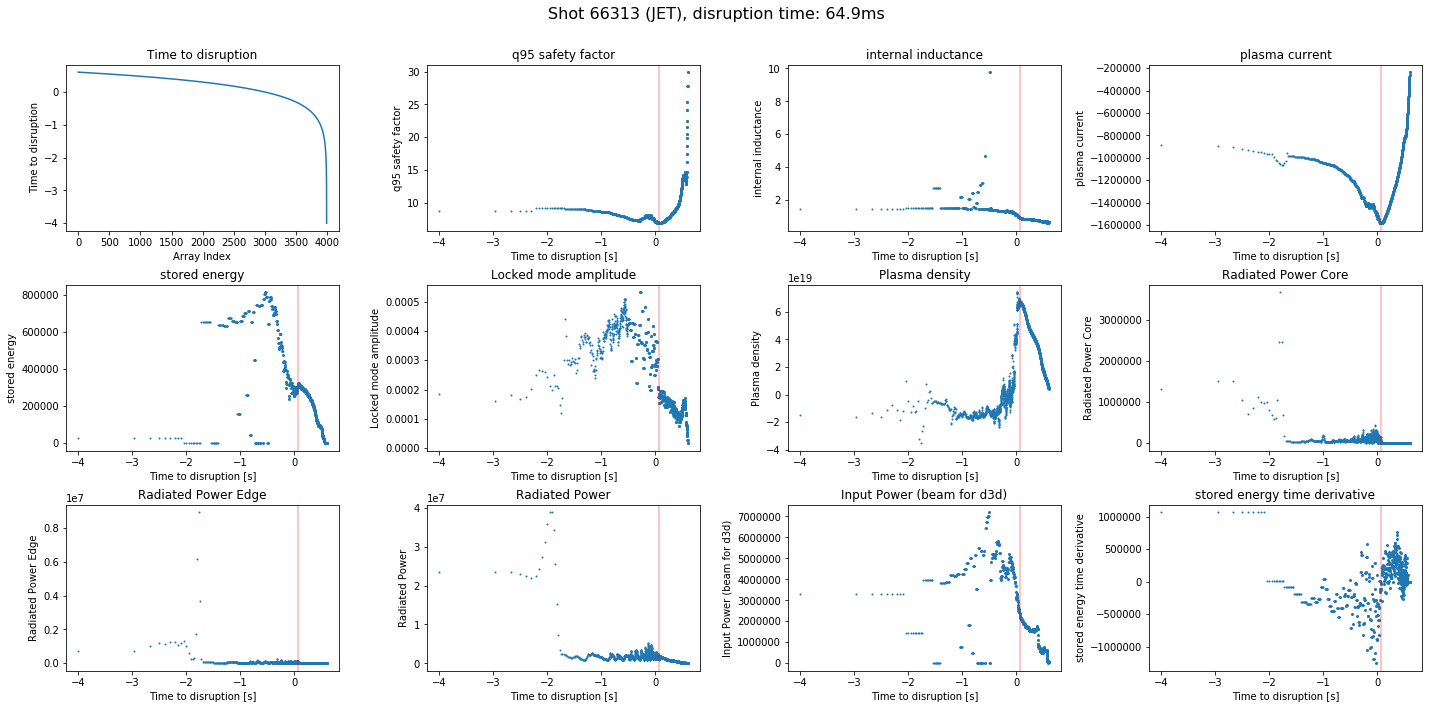

In [197]:
fig, ax_grid = plt.subplots(nrows=3, ncols=4, figsize=(20,10))
ax = ax_grid.flatten()

ax[0].plot(ttd)
ax[0].set_ylabel('Time to disruption')
ax[0].set_title('Time to disruption')
ax[0].set_xlabel('Array Index')

for i,(k,v) in enumerate(signals_dict.items()):
    ax[i+1].plot(ttd,v, '.', markersize=2)
    ax[i+1].set_ylabel(k)
    ax[i+1].set_xlabel('Time to disruption [s]')
    if(shot.is_disruptive):
        # t_disrupt is in miliseconds!
        ax[i+1].axvline(x=shot.t_disrupt/1000, color='r', alpha=0.3)
    ax[i+1].set_title(k)

if shot.is_disruptive:
    title='Shot {0} ({1}), disruption time: {2:0.1f}ms'.format(shot.number, shot.machine.name.upper(), shot.t_disrupt)
    
else:
    title='Shot {0} ({1}), non-disruptive'.format(shot.number, shot.machine)
fig.suptitle(title, fontsize=16)
fig.tight_layout()
fig.subplots_adjust(top=0.9)
fig.savefig(outdir+'{}{}.pdf'.format(shot.machine, shot.number))